In [2]:
import pandas as pd
from fbprophet import Prophet
import plotly.express as px

ModuleNotFoundError: ignored

In [ ]:
import plotly.io as pio
pio.renderers.default = 'colab'

In [ ]:
from google.colab import files
files.upload()

Saving Bitcoin_dataset - Sheet1 (1).csv to Bitcoin_dataset - Sheet1 (1).csv


{'Bitcoin_dataset - Sheet1 (1).csv': b'Date,Close\r\n1/1/2017,992.95\r\n1/2/2017,1011.45\r\n1/3/2017,1020.67\r\n1/4/2017,1130.3\r\n1/5/2017,1007\r\n1/6/2017,895.71\r\n1/7/2017,909\r\n1/8/2017,923.33\r\n1/9/2017,902.66\r\n1/10/2017,907\r\n1/11/2017,795.77\r\n1/12/2017,812.25\r\n1/13/2017,831.42\r\n1/14/2017,828\r\n1/15/2017,833.31\r\n1/16/2017,834.41\r\n1/17/2017,906\r\n1/18/2017,887.99\r\n1/19/2017,902.92\r\n1/20/2017,894.31\r\n1/21/2017,925.06\r\n1/22/2017,931.22\r\n1/23/2017,910.7\r\n1/24/2017,887\r\n1/25/2017,896\r\n1/26/2017,917.02\r\n1/27/2017,922.63\r\n1/28/2017,924.98\r\n1/29/2017,916.54\r\n1/30/2017,923.23\r\n1/31/2017,970.01\r\n2/1/2017,992.75\r\n2/2/2017,1008.38\r\n2/3/2017,1018\r\n2/4/2017,1035.54\r\n2/5/2017,1016.32\r\n2/6/2017,1022.58\r\n2/7/2017,1053.96\r\n2/8/2017,1056.7\r\n2/9/2017,994.24\r\n2/10/2017,1001.99\r\n2/11/2017,1018.65\r\n2/12/2017,1010\r\n2/13/2017,1002.82\r\n2/14/2017,1013.92\r\n2/15/2017,1014.53\r\n2/16/2017,1038.94\r\n2/17/2017,1057.3\r\n2/18/2017,1062.15

In [ ]:
df=pd.read_csv('Bitcoin_dataset - Sheet1 (1).csv')

In [ ]:
df

,Date,Close
0,1/1/2017,992.95
1,1/2/2017,1011.45
2,1/3/2017,1020.67
3,1/4/2017,1130.30
4,1/5/2017,1007.00
...,...,...
1880,2/24/2022,38347.30
1881,2/25/2022,39251.10
1882,2/26/2022,39137.80
1883,2/27/2022,37717.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1885 non-null   object 
 1   Close   1885 non-null   float64
dtypes: float64(1), object(1)
memory usage: 29.6+ KB


In [ ]:
#get statistics
df.describe()

,Close
count,1885.00000
mean,16282.25305
std,17312.42462
min,795.77000
25%,5739.97000
50%,8795.50000
75%,17723.50000
max,67582.60000


In [ ]:
#area graph (Date Vs Price)
px.area(df,
        x='Date',
        y='Close')


In [ ]:
#violin plot
px.violin(df,
          y='Close')

In [ ]:
#get columns' names
df.columns

Index(['Date', 'Close'], dtype='object')

In [ ]:
#rename columns
prophet_df = df.rename(columns={'Date':'ds',
                                'Close':'y'})

#check
prophet_df.columns

Index(['ds', 'y'], dtype='object')

In [ ]:
#initialize
m = Prophet()

#fit
m.fit(prophet_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#forecast for the next 30 days
future = m.make_future_dataframe(periods=30)

#predict
forecast = m.predict(future)

In [ ]:

#check out forecast
forecast.tail(30)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1885,2022-03-01,48182.186485,42892.899454,53970.736218,48182.186485,48182.186485,464.159372,464.159372,464.159372,2.054149,2.054149,2.054149,462.105223,462.105223,462.105223,0.0,0.0,0.0,48646.345857
1886,2022-03-02,48189.790815,43304.712738,54402.457995,48189.790815,48189.790815,516.077459,516.077459,516.077459,27.238613,27.238613,27.238613,488.838846,488.838846,488.838846,0.0,0.0,0.0,48705.868274
1887,2022-03-03,48197.395144,42953.060541,54114.107428,48197.395144,48197.395144,473.278648,473.278648,473.278648,-41.688687,-41.688687,-41.688687,514.967334,514.967334,514.967334,0.0,0.0,0.0,48670.673792
1888,2022-03-04,48204.999474,43188.962026,54444.539375,48204.999474,48204.999474,531.995012,531.995012,531.995012,-9.421241,-9.421241,-9.421241,541.416253,541.416253,541.416253,0.0,0.0,0.0,48736.994486
1889,2022-03-05,48212.603804,43049.584819,54008.942169,48212.603804,48212.603804,583.012117,583.012117,583.012117,14.007317,14.007317,14.007317,569.004801,569.004801,569.004801,0.0,0.0,0.0,48795.615922
1890,2022-03-06,48220.208134,43506.712818,54307.902675,48220.208134,48220.208134,587.767518,587.767518,587.767518,-10.658086,-10.658086,-10.658086,598.425604,598.425604,598.425604,0.0,0.0,0.0,48807.975652
1891,2022-03-07,48227.812464,43471.780436,54125.170814,48227.812464,48227.812464,648.696721,648.696721,648.696721,18.467936,18.467936,18.467936,630.228785,630.228785,630.228785,0.0,0.0,0.0,48876.509185
1892,2022-03-08,48235.416794,43240.853026,54439.308279,48235.416794,48235.416794,666.864755,666.864755,666.864755,2.054149,2.054149,2.054149,664.810607,664.810607,664.810607,0.0,0.0,0.0,48902.281549
1893,2022-03-09,48243.021124,43193.729797,54074.445654,48243.021124,48243.021124,729.645506,729.645506,729.645506,27.238613,27.238613,27.238613,702.406893,702.406893,702.406893,0.0,0.0,0.0,48972.666630
1894,2022-03-10,48250.625454,43480.545332,54195.876330,48250.625454,48250.625454,701.402571,701.402571,701.402571,-41.688687,-41.688687,-41.688687,743.091258,743.091258,743.091258,0.0,0.0,0.0,48952.028025


In [ ]:


forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915 entries, 0 to 1914
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          1915 non-null   datetime64[ns]
 1   trend                       1915 non-null   float64       
 2   yhat_lower                  1915 non-null   float64       
 3   yhat_upper                  1915 non-null   float64       
 4   trend_lower                 1915 non-null   float64       
 5   trend_upper                 1915 non-null   float64       
 6   additive_terms              1915 non-null   float64       
 7   additive_terms_lower        1915 non-null   float64       
 8   additive_terms_upper        1915 non-null   float64       
 9   weekly                      1915 non-null   float64       
 10  weekly_lower                1915 non-null   float64       
 11  weekly_upper                1915 non-null   float64     

In [ ]:
forecast["year"]=forecast["ds"].dt.year
forecast["month"]=forecast["ds"].dt.month
forecast["day"]=forecast["ds"].dt.day
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915 entries, 0 to 1914
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          1915 non-null   datetime64[ns]
 1   trend                       1915 non-null   float64       
 2   yhat_lower                  1915 non-null   float64       
 3   yhat_upper                  1915 non-null   float64       
 4   trend_lower                 1915 non-null   float64       
 5   trend_upper                 1915 non-null   float64       
 6   additive_terms              1915 non-null   float64       
 7   additive_terms_lower        1915 non-null   float64       
 8   additive_terms_upper        1915 non-null   float64       
 9   weekly                      1915 non-null   float64       
 10  weekly_lower                1915 non-null   float64       
 11  weekly_upper                1915 non-null   float64     

In [ ]:
y=int(input())
m=int(input())
d=int(input())
for i in range(0,1915):
  if (y==forecast.year[i]  and m==forecast.month[i] and d==forecast.day[i]):
    print(forecast.yhat[i])
    break

2022
2
21
48241.67427622419


In [ ]:
forecast.describe()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,...,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,year,month,day
count,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,...,1915.000000,1915.000000,1915.000000,1915.0,1915.0,1915.0,1915.000000,1915.000000,1915.000000,1915.000000
mean,16808.794674,11221.337312,22371.117345,16808.330556,16809.108864,-9.862765,-9.862765,-9.862765,0.019375,0.019375,...,-9.882139,-9.882139,-9.882139,0.0,0.0,0.0,16798.931910,2019.139948,6.312794,15.710705
std,16810.965588,16893.016414,16895.884053,16810.095010,16811.556743,1525.383968,1525.383968,1525.383968,21.457828,21.457828,...,1525.215366,1525.215366,1525.215366,0.0,0.0,0.0,16899.399770,1.518691,3.505604,8.792979
min,-1145.484861,-8551.045911,2497.468632,-1145.484861,-1145.484861,-2918.224571,-2918.224571,-2918.224571,-41.688687,-41.688687,...,-2876.840885,-2876.840885,-2876.840885,0.0,0.0,0.0,-2783.409133,2017.000000,1.000000,1.000000
25%,6446.114623,502.567240,11611.890848,6446.114623,6446.114623,-1184.189931,-1184.189931,-1184.189931,-10.658086,-10.658086,...,-1187.150774,-1187.150774,-1187.150774,0.0,0.0,0.0,6012.669515,2018.000000,3.000000,8.000000
50%,8543.789645,3176.243195,14333.696974,8543.789645,8543.789645,202.662822,202.662822,202.662822,2.054149,2.054149,...,201.414541,201.414541,201.414541,0.0,0.0,0.0,8690.701287,2019.000000,6.000000,16.000000
75%,25604.817962,19557.436906,30936.287896,25604.817962,25604.817962,1251.837499,1251.837499,1251.837499,18.467936,18.467936,...,1242.772198,1242.772198,1242.772198,0.0,0.0,0.0,25266.220123,2020.000000,9.000000,23.000000
max,48402.712052,44732.785932,56210.643020,48314.582069,48528.880991,3033.772053,3033.772053,3033.772053,27.238613,27.238613,...,3006.636897,3006.636897,3006.636897,0.0,0.0,0.0,50265.417299,2022.000000,12.000000,31.000000


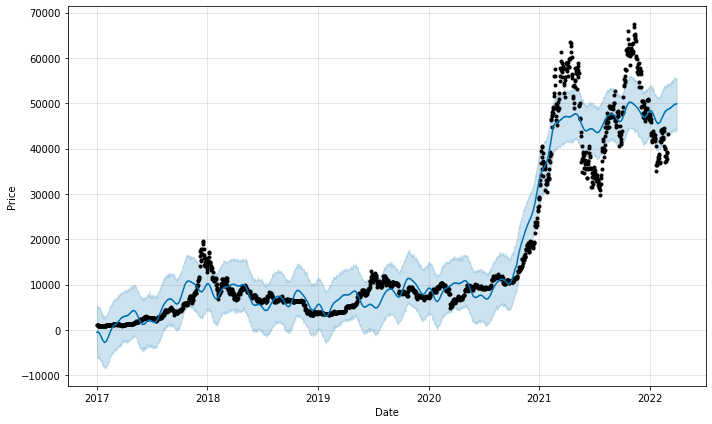

In [ ]:
#visualize with Facebook internal tool
figure_1 = m.plot(forecast,
                    xlabel='Date',
                    ylabel='Price')

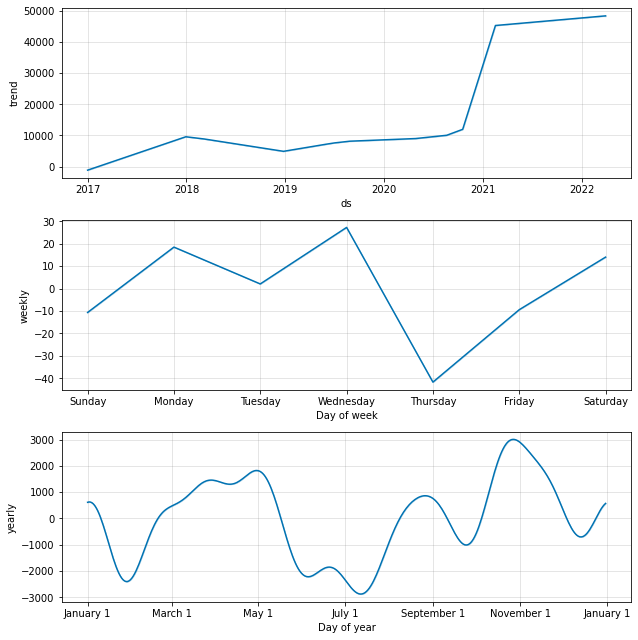

In [ ]:
#visualize forecast
figure_2 = m.plot_components(forecast)

In [ ]:

#convert dataset into csv file
forecast.to_csv('bitcoin_forecast.csv')

#download dataset
from google.colab import files
files.download('bitcoin_forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>